In [1]:
from sklearn.model_selection import train_test_split
from FetusGrowth_BWPrediction import *
import pandas as pd
import numpy as np

In [2]:
data_df = pd.read_csv('seethapathyCleanedData.csv')
data = getMeasurements_int(data_df)

In [3]:
A_value = pd.read_csv('Avalue.csv')

A_hc, A_ac,  = list(A_value['Avalue_hc']), list(A_value['Avalue_ac'])
A_bpd, A_fl = list(A_value['Avalue_bpd']), list(A_value['Avalue_fl'])


t0C_list = pd.read_csv('t0_c.csv')

t0_hc,c_hc = t0C_list['t0_hc'][0], t0C_list['c_hc'][0]
t0_ac,c_ac = t0C_list['t0_ac'][0], t0C_list['c_ac'][0]
t0_bpd,c_bpd = t0C_list['t0_bpd'][0], t0C_list['c_bpd'][0]
t0_fl,c_fl = t0C_list['t0_fl'][0], t0C_list['c_fl'][0]

In [4]:
mean_A_hc, mean_A_ac = np.mean(A_hc),np.mean(A_ac)
mean_A_bpd, mean_A_fl = np.mean(A_bpd), np.mean(A_fl)

In [5]:
maperr_hc = OnlyCalError(data,list(data['GA']),list(data['HC']),mean_A_hc,t0_hc,c_hc)
maperr_ac = OnlyCalError(data,list(data['GA']),list(data['AC']),mean_A_ac,t0_ac,c_ac)
maperr_bpd = OnlyCalError(data,list(data['GA']),list(data['BPD']),mean_A_bpd,t0_bpd,c_bpd)
maperr_fl = OnlyCalError(data,list(data['GA']),list(data['FL_Rt']),mean_A_fl,t0_fl,c_fl)

In [6]:
maperr_hc_ig = []
for i in range(len(list(data['GA']))):
        ydata = np.array(list(data['HC'])[i])
        hcp =[]
        for j in range(len(ydata)):
            hcp.append(hc_mean_sd(list(data['GA'])[i][j])[0])
        err = np.mean((ydata-hcp)**2)
        maperr_hc_ig.append(err)
        
maperr_ac_ig = []
for i in range(len(list(data['GA']))):
        ydata = np.array(list(data['AC'])[i])
        acp =[]
        for j in range(len(ydata)):
            acp.append(ac_mean_sd(list(data['GA'])[i][j])[0])
        err = np.mean((ydata-acp)**2)
        maperr_ac_ig.append(err)
        
maperr_bpd_ig = []
for i in range(len(list(data['GA']))):
        ydata = np.array(list(data['BPD'])[i])
        bpdp =[]
        for j in range(len(ydata)):
            bpdp.append(bpd_mean_sd(list(data['GA'])[i][j])[0])
        err = np.mean((ydata-bpdp)**2)
        maperr_bpd_ig.append(err)

maperr_fl_ig = []
for i in range(len(list(data['GA']))):
        ydata = np.array(list(data['FL_Rt'])[i])
        flp =[]
        for j in range(len(ydata)):
            flp.append(fl_mean_sd(list(data['GA'])[i][j])[0])
        err = np.mean((ydata-flp)**2)
        maperr_fl_ig.append(err)

In [7]:
plt.rcParams.update({
"xtick.labelsize": 20,
    "ytick.labelsize": 20,
    'legend.fontsize': 20,
    'axes.labelsize': 25 ,
    
     'axes.titlesize': 20,
   
    'font.serif': 'DejaVu Serif'
    })

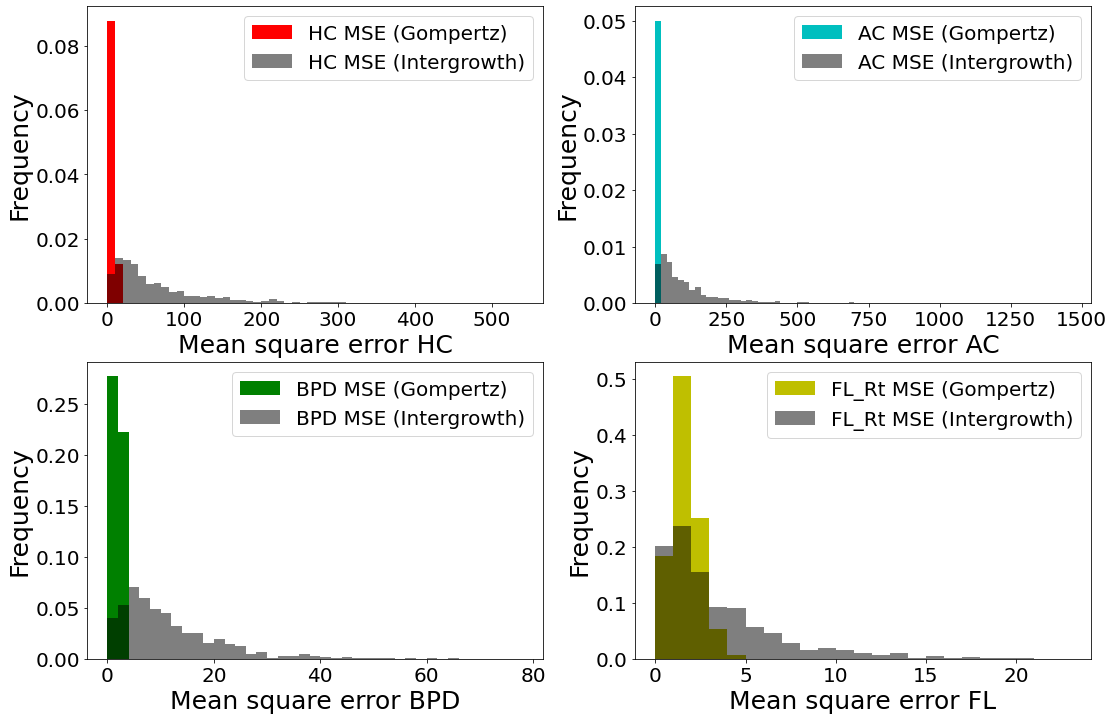

In [8]:
# histogram plot for MAPE error

fig, ax = plt.subplots(2, 2, figsize=(18, 12))

ax[0,0].hist(maperr_hc, bins = range(0,int(max(maperr_hc)),10),color = "r",density = True,label='HC MSE (Gompertz)');
ax[0,0].hist(maperr_hc_ig, bins = range(0,int(max(maperr_hc_ig)),10),color = "k",density = True, alpha=0.5,label='HC MSE (Intergrowth)');
ax[0,0].legend(loc='upper right')

ax[0,1].hist(maperr_ac, bins = range(0,int(max(maperr_ac)),20),color = "c",density = True,label='AC MSE (Gompertz)');
ax[0,1].hist(maperr_ac_ig, bins = range(0,int(max(maperr_ac_ig)),20),color = "k", density = True, alpha = 0.5,label='AC MSE (Intergrowth)');
ax[0,1].legend(loc='upper right')

ax[1,0].hist(maperr_bpd, bins = range(0,int(max(maperr_bpd)),2),color = "g",density = True,label='BPD MSE (Gompertz)');
ax[1,0].hist(maperr_bpd_ig, bins = range(0,int(max(maperr_bpd_ig)),2),color = "k",density = True,alpha = 0.5,label='BPD MSE (Intergrowth)');
ax[1,0].legend(loc='upper right')

ax[1,1].hist(maperr_fl, bins = range(0,int(max(maperr_fl))),color = "y",density = True,label='FL_Rt MSE (Gompertz)');
ax[1,1].hist(maperr_fl_ig, bins = range(0,int(max(maperr_fl_ig))),color = "k",density = True, alpha = 0.5,label='FL_Rt MSE (Intergrowth)');
ax[1,1].legend(loc='upper right')

 
ax[0][0].set_xlabel('Mean square error HC')
ax[0][0].set_ylabel('Frequency')

ax[0][1].set_xlabel('Mean square error AC')
ax[0][1].set_ylabel('Frequency')

ax[1][0].set_xlabel('Mean square error BPD')
ax[1][0].set_ylabel('Frequency')

ax[1][1].set_xlabel('Mean square error FL')
ax[1][1].set_ylabel('Frequency');
plt.savefig('FigOutput/MSE_error_Intergrowth_comparision.png',dpi = 600,bbox_inches='tight')
plt.savefig('FigOutput/MSE_error_Intergrowth_comparision.pdf',dpi = 600,bbox_inches='tight')

In [9]:
X = data.drop(['BIRTH_WEIGHT'], axis=1)
y = data['BIRTH_WEIGHT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [10]:
A_value50 = pd.read_csv('Avalue50%.csv')

A_hc50, A_ac50,  = list(A_value['Avalue_hc']), list(A_value['Avalue_ac'])
A_bpd50, A_fl50 = list(A_value['Avalue_bpd']), list(A_value['Avalue_fl'])


t0C_list50 = pd.read_csv('t0_c50%.csv')

t0_hc50,c_hc50 = t0C_list['t0_hc'][0], t0C_list['c_hc'][0]
t0_ac50,c_ac50 = t0C_list['t0_ac'][0], t0C_list['c_ac'][0]
t0_bpd50,c_bpd50 = t0C_list['t0_bpd'][0], t0C_list['c_bpd'][0]
t0_fl50,c_fl50 = t0C_list['t0_fl'][0], t0C_list['c_fl'][0]

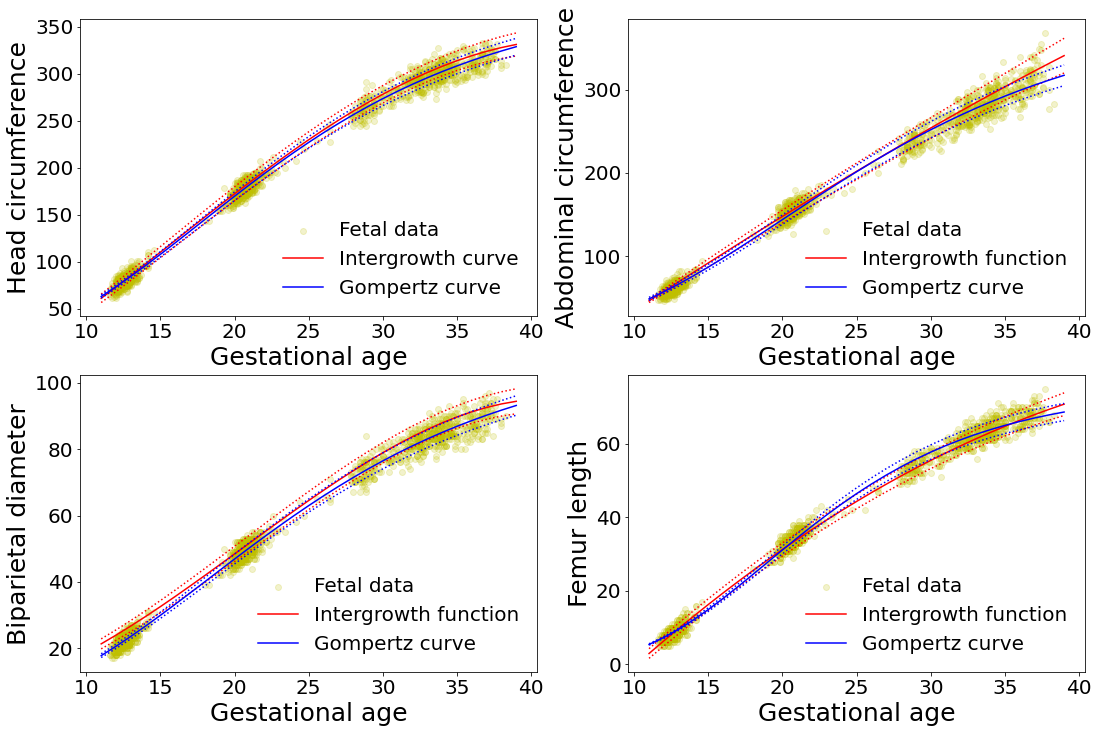

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

for i in range(len(X_test['GA'])):
    hc = X_test['HC'].iloc[i] 
    ax[0][0].scatter(X_test['GA'].iloc[i],hc,color='y',alpha = 0.2)
    
ax[0][0].scatter(X_test['GA'].iloc[i],hc,color='y',alpha = 0.2,label = 'Fetal data')
gax = range(11,40)
mean = [hc_mean_sd(x)[0] for x in gax]
std1 = [hc_mean_sd(x)[0]+hc_mean_sd(x)[1] for x in gax]
std2 = [hc_mean_sd(x)[0]-hc_mean_sd(x)[1] for x in gax]

mean_Ahc = [func(t,np.mean(A_hc50),t0_hc50,c_hc50 ) for t in gax]
std1_Ahc = [func(t,np.mean(A_hc50)+np.std(A_hc50),t0_hc50,c_hc50) for t in gax]
std2_Ahc = [func(t,np.mean(A_hc50)-np.std(A_hc50),t0_hc50,c_hc50) for t in gax]

ax[0][0].plot(gax,mean,'r-',label = 'Intergrowth curve')
ax[0][0].plot(gax,std1,'r:')
ax[0][0].plot(gax,std2,'r:')
ax[0][0].plot(gax,mean_Ahc,'b',label = 'Gompertz curve')
ax[0][0].plot(gax,std1_Ahc,'b:')
ax[0][0].plot(gax,std2_Ahc,'b:')
ax[0][0].legend(loc='lower right', frameon = False)
ax[0][0].set_xlabel('Gestational age')
ax[0][0].set_ylabel('Head circumference')

#plt.figure(figsize=(8,5));

for i in range(len(X_test['GA'])):
    ac = X_test['AC'].iloc[i] 
    ax[0][1].scatter(X_test['GA'].iloc[i],ac,color='y',alpha = 0.2)

ax[0][1].scatter(X_test['GA'].iloc[i],ac,color='y',alpha = 0.2,label = 'Fetal data')    
gax = range(11,40)
mean = [ac_mean_sd(x)[0] for x in gax]
std1 = [ac_mean_sd(x)[0]+ac_mean_sd(x)[1] for x in gax]
std2 = [ac_mean_sd(x)[0]-ac_mean_sd(x)[1] for x in gax]

mean_Aac = [func(t,np.mean(A_ac50),t0_ac50,c_ac50 ) for t in gax]
std1_Aac = [func(t,np.mean(A_ac50)+np.std(A_ac50),t0_ac50,c_ac50) for t in gax]
std2_Aac = [func(t,np.mean(A_ac50)-np.std(A_ac50),t0_ac50,c_ac50) for t in gax]

ax[0][1].plot(gax,mean,'r-',label = 'Intergrowth function')
ax[0][1].plot(gax,std1,'r:')
ax[0][1].plot(gax,std2,'r:')
ax[0][1].plot(gax,mean_Aac,'b',label = 'Gompertz curve')
ax[0][1].plot(gax,std1_Aac,'b:')
ax[0][1].plot(gax,std2_Aac,'b:')

ax[0][1].legend(loc='lower right', frameon = False)
ax[0][1].set_xlabel('Gestational age')
ax[0][1].set_ylabel('Abdominal circumference');


for i in range(len(X_test['GA'])):
    bpd = X_test['BPD'].iloc[i] 
    ax[1][0].scatter(X_test['GA'].iloc[i],bpd,color='y',alpha = 0.2)

ax[1][0].scatter(X_test['GA'].iloc[i],bpd,color='y',alpha = 0.2,label = 'Fetal data')
gax = range(11,40)
mean = [bpd_mean_sd(x)[0] for x in gax]
std1 = [bpd_mean_sd(x)[0]+bpd_mean_sd(x)[1] for x in gax]
std2 = [bpd_mean_sd(x)[0]-bpd_mean_sd(x)[1] for x in gax]

mean_Abpd = [func(t,np.mean(A_bpd50),t0_bpd50,c_bpd50 ) for t in gax]
std1_Abpd = [func(t,np.mean(A_bpd50)+np.std(A_bpd50),t0_bpd50,c_bpd50) for t in gax]
std2_Abpd = [func(t,np.mean(A_bpd50)-np.std(A_bpd50),t0_bpd50,c_bpd50) for t in gax]

ax[1][0].plot(gax,mean,'r-',label = 'Intergrowth function')
ax[1][0].plot(gax,std1,'r:')
ax[1][0].plot(gax,std2,'r:')
ax[1][0].plot(gax,mean_Abpd,'b',label = 'Gompertz curve')
ax[1][0].plot(gax,std1_Abpd,'b:')
ax[1][0].plot(gax,std2_Abpd,'b:')

ax[1][0].legend(loc='lower right', frameon = False)
ax[1][0].set_xlabel('Gestational age')
ax[1][0].set_ylabel('Biparietal diameter');

for i in range(len(X_test['GA'])):
    fl = X_test['FL_Rt'].iloc[i] 
    ax[1][1].scatter(X_test['GA'].iloc[i],fl,color='y',alpha = 0.2)
    
ax[1][1].scatter(X_test['GA'].iloc[i],fl,color='y',alpha = 0.2,label = 'Fetal data')
gax = range(11,40)
mean = [fl_mean_sd(x)[0] for x in gax]
std1 = [fl_mean_sd(x)[0]+fl_mean_sd(x)[1] for x in gax]
std2 = [fl_mean_sd(x)[0]-fl_mean_sd(x)[1] for x in gax]

mean_Afl = [func(t,np.mean(A_fl50),t0_fl50,c_fl50 ) for t in gax]
std1_Afl = [func(t,np.mean(A_fl50)+np.std(A_fl50),t0_fl50,c_fl50) for t in gax]
std2_Afl = [func(t,np.mean(A_fl50)-np.std(A_fl50),t0_fl50,c_fl50) for t in gax]

ax[1][1].plot(gax,mean,'r-',label = 'Intergrowth function')
ax[1][1].plot(gax,std1,'r:')
ax[1][1].plot(gax,std2,'r:')
ax[1][1].plot(gax,mean_Afl,'b',label = 'Gompertz curve')
ax[1][1].plot(gax,std1_Afl,'b:')
ax[1][1].plot(gax,std2_Afl,'b:')

ax[1][1].legend(loc='lower right',frameon = False)
ax[1][1].set_xlabel('Gestational age')
ax[1][1].set_ylabel('Femur length');

plt.savefig('FigOutput/Intergrowth_gompertz.png',dpi = 600,bbox_inches='tight')
plt.savefig('FigOutput/Intergrowth_gompertz.pdf',dpi = 600,bbox_inches='tight')